#**Recommender System For Movie Database**

##**A basic recommendation developed systems using Python and pandas.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Exploratory Analysis

In [2]:
user_ratings=pd.read_csv('ratings.csv')

In [3]:
user_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
#total number of unique userId?
user_ratings['userId'].nunique()

610

In [5]:
movie_info=pd.read_csv('movies.csv')
movie_info.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [31]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 152.3+ KB


In [9]:
#join the tables/dataframes or merge them based on fkey and pkey 
movie_ratings=pd.merge(user_ratings,movie_info,on='movieId')

In [10]:
movie_ratings

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [11]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
title        100836 non-null object
genres       100836 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


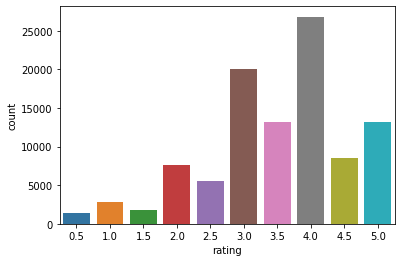

In [14]:
#what are the frequencies of the ratings??
sns.countplot(x='rating',data=movie_ratings)

In [15]:
#well most movies have been rated with 4.0 which seems to be the most popular rating out there

In [16]:
#how many ratings have each movies got??
rating_count_per_movie=movie_ratings.groupby('title')['rating'].count()

In [17]:
rating_count_per_movie.head()

title
'71 (2014)                                 1
'Hellboy': The Seeds of Creation (2004)    1
'Round Midnight (1986)                     2
'Salem's Lot (2004)                        1
'Til There Was You (1997)                  2
Name: rating, dtype: int64

In [20]:
rating_count_per_movie.sort_values(ascending=False)

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
                                                                                 ... 
Late Night Shopping (2001)                                                          1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004)      1
Late Shift, The (1996)                                                              1
Latter Days (2003)                                                                  1
'71 (2014)                                                                          1
Name: rating, Length: 9719, dtype: int64

In [21]:
#Ahmm Forrest Gump has been rated a lot by the viewers

In [26]:
#convert ratings per movie into a dataframe
stats_per_movie=pd.DataFrame(rating_count_per_movie.sort_values(ascending=False))

In [28]:
stats_per_movie

,rating
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278
...,...
Late Night Shopping (2001),1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004),1
"Late Shift, The (1996)",1


In [29]:
#add a new column that represents the avg movie rating
stats_per_movie['avg_rating']=movie_ratings.groupby('title')['rating'].mean()

In [36]:
stats_per_movie.tail()

,rating,avg_rating
title,,
Late Night Shopping (2001),1,4.5
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004),1,2.0
"Late Shift, The (1996)",1,2.5
Latter Days (2003),1,3.5
'71 (2014),1,4.0


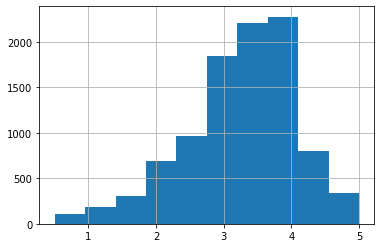

In [32]:
#let's have a look at how average ratings are distributed
stats_per_movie['avg_rating'].hist()

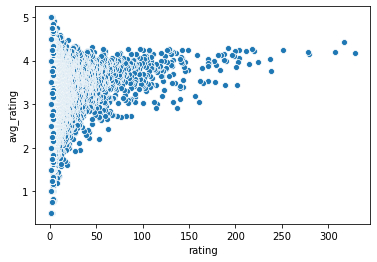

In [35]:
#is there any correlation between the most rated movies and the highly rated movies???
sns.scatterplot(x='rating',y='avg_rating',data=stats_per_movie)
#not certainly ,even a movie that was watched by only one person has been rated with 5!

In [33]:
#now that we've acquired enough data needed to recommend someone a movie based on their interest
#we shall procced towards building the recommender system!

In [69]:
reshaped_df=movie_ratings.pivot_table(columns='title',index='userId',values='rating')
reshaped_df.head(20)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [70]:
#now randomly pickup a movie
recommend_like_ForrestGump=reshaped_df.corrwith(reshaped_df['Forrest Gump (1994)'])

In [71]:
recommend_like_ForrestGump=recommend_like_ForrestGump.sort_values(ascending=False)

In [72]:
recommend_like_ForrestGump

title
Violet & Daisy (2011)                                     1.0
Savages (2012)                                            1.0
Get a Job (2016)                                          1.0
Runner Runner (2013)                                      1.0
Underworld: Awakening (2012)                              1.0
                                                         ... 
Zoom (2015)                                               NaN
Zulu (2013)                                               NaN
[REC]³ 3 Génesis (2012)                                   NaN
anohana: The Flower We Saw That Day - The Movie (2013)    NaN
À nous la liberté (Freedom for Us) (1931)                 NaN
Length: 9719, dtype: float64

In [46]:
#but there is an irregularity /a hitch.
#what if person just only one watched only Violet Daisy and Forrest Gump???
#hence we will set off a threshold factor

In [73]:
recommend_like_ForrestGump=pd.DataFrame(recommend_like_ForrestGump,columns=['Corr value'])

In [74]:
recommend_like_ForrestGump

,Corr value
title,
Violet & Daisy (2011),1.0
Savages (2012),1.0
Get a Job (2016),1.0
Runner Runner (2013),1.0
Underworld: Awakening (2012),1.0
...,...
Zoom (2015),NaN
Zulu (2013),NaN
[REC]³ 3 Génesis (2012),NaN


In [79]:
recommend_like_ForrestGump['Corr value'].value_counts()

 1.000000    310
-1.000000    258
 1.000000    235
-1.000000    159
 0.000000    112
            ... 
 0.423984      1
 0.367362      1
 0.330646      1
 0.308556      1
 0.565779      1
Name: Corr value, Length: 3768, dtype: int64

In [82]:
recommend_like_ForrestGump.dropna(inplace=True)

In [83]:
recommend_like_ForrestGump

,Corr value
title,
Violet & Daisy (2011),1.0
Savages (2012),1.0
Get a Job (2016),1.0
Runner Runner (2013),1.0
Underworld: Awakening (2012),1.0
...,...
Gigi (1949),-1.0
Coal Miner's Daughter (1980),-1.0
"Closet, The (Placard, Le) (2001)",-1.0


In [84]:
recommend_like_ForrestGump

,Corr value
title,
Violet & Daisy (2011),1.0
Savages (2012),1.0
Get a Job (2016),1.0
Runner Runner (2013),1.0
Underworld: Awakening (2012),1.0
...,...
Gigi (1949),-1.0
Coal Miner's Daughter (1980),-1.0
"Closet, The (Placard, Le) (2001)",-1.0


In [93]:
recommend_like_ForrestGump=pd.DataFrame(recommend_like_ForrestGump,columns=['Corr value'])

In [94]:
recommend_like_ForrestGump

,Corr value
title,
Violet & Daisy (2011),1.0
Playing God (1997),1.0
"Vitelloni, I (a.k.a. The Young and the Passionate) (1953)",1.0
Night of the Creeps (1986),1.0
Poison Ivy: New Seduction (1997),1.0
...,...
Planes: Fire & Rescue (2014),-1.0
Denis Leary: No Cure for Cancer (1993),-1.0
"Misérables, Les (2000)",-1.0


In [96]:
recommend_like_ForrestGump=pd.merge(recommend_like_ForrestGump,stats_per_movie,on='title')

In [97]:
recommend_like_ForrestGump

,Corr value,rating,avg_rating
title,,,
Violet & Daisy (2011),1.0,2,3.000000
Playing God (1997),1.0,3,2.500000
"Vitelloni, I (a.k.a. The Young and the Passionate) (1953)",1.0,2,3.500000
Night of the Creeps (1986),1.0,3,3.166667
Poison Ivy: New Seduction (1997),1.0,3,2.333333
...,...,...,...
Planes: Fire & Rescue (2014),-1.0,2,2.250000
Denis Leary: No Cure for Cancer (1993),-1.0,2,3.000000
"Misérables, Les (2000)",-1.0,2,2.250000


In [99]:
res=recommend_like_ForrestGump[recommend_like_ForrestGump['rating']>50]

In [101]:
res.head(10)
#top 10 movies which are kinda similar to Forrest Gump in ratings and pop!

,Corr value,rating,avg_rating
title,,,
Forrest Gump (1994),1.000000,329,4.164134
Mr. Holland's Opus (1995),0.652144,80,3.706250
Pocahontas (1995),0.550118,68,3.147059
Grumpier Old Men (1995),0.534682,52,3.259615
Caddyshack (1980),0.520328,52,3.826923
"Few Good Men, A (1992)",0.517146,57,3.789474
Field of Dreams (1989),0.503845,56,3.517857
Big (1988),0.492351,91,3.719780
Hook (1991),0.484676,53,3.358491


THE END!